# O-GlcNAc Prediction

_

## Environment and data

_

In [1]:
# Standard library imports
import random

# Related third party imports
import numpy as np

# Local application/library specific imports
import nnlibs.initialize
from nnlibs.commons.maths import relu, softmax
from nnlibs.commons.library import (
    configure_directory,
    read_model,
)
from nnlibs.network.models import EpyNN
from nnlibs.embedding.models import Embedding
from nnlibs.rnn.models import RNN
from nnlibs.lstm.models import LSTM
from nnlibs.gru.models import GRU
from nnlibs.flatten.models import Flatten
from nnlibs.dropout.models import Dropout
from nnlibs.dense.models import Dense
from prepare_dataset import prepare_dataset
from settings import se_hPars


########################## CONFIGURE ##########################
random.seed(1)

np.set_printoptions(threshold=10)

np.seterr(all='warn')
np.seterr(under='ignore')

############################ DATASET ##########################
X_features, Y_label = prepare_dataset(N_SAMPLES=1280)

_

## Feed-Forward (FF)

_

### Embedding

_

In [2]:
embedding = Embedding(X_data=X_features,
                      Y_data=Y_label,
                      X_encode=True,
                      Y_encode=True,
                      batch_size=32,
                      relative_size=(2, 1, 0))

_

### Multiple layers with Dropout

_

In [3]:
name = 'Flatten_Dropout-08_Dense-64-relu_Dropout-07_Dense-2-softmax'

se_hPars['learning_rate'] = 0.005

flatten = Flatten()

dropout1 = Dropout(keep_prob=0.8)

hidden_dense = Dense(64, relu)

dropout2 = Dropout(keep_prob=0.7)

dense = Dense(2, softmax)

layers = [embedding, flatten, dropout1, hidden_dense, dropout2, dense]

model = EpyNN(layers=layers, name=name)

_

In [4]:
model.initialize(loss='MSE', seed=1, se_hPars=se_hPars.copy())

--- EpyNN Check --- 
Layer: Embedding
compute_shapes: Embedding
initialize_parameters: Embedding
forward: Embedding
Layer: Flatten
compute_shapes: Flatten
initialize_parameters: Flatten
forward: Flatten
Layer: Dropout
compute_shapes: Dropout
initialize_parameters: Dropout
forward: Dropout
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dropout
compute_shapes: Dropout
initialize_parameters: Dropout
forward: Dropout
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: Dropout
backward: Dropout
compute_gradients: Dropout
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: Dropout
backward: Dropout
compute_gradients: Dropout
Layer: Flatten
backward: Flatten
compute_gradients: Flatten
Layer: Embedding
backward: Embedding
compute_gradients: Embedding


_

In [5]:
model.train(epochs=100, init_logs=False)

+-------+----------+----------+-------+----------+-------+-------+------------------------------------------------------------------------+
| epoch |  lrate   |  lrate   |       | accuracy |       |  MSE  |                               Experiment                               |
|       |  Dense   |  Dense   |  (0)  |   (1)    |  (0)  |  (1)  |                                                                        |
+-------+----------+----------+-------+----------+-------+-------+------------------------------------------------------------------------+
|   0   | 5.00e-03 | 5.00e-03 | 0.574 |  0.508   | 0.350 | 0.395 | 1628624067_Flatten_Dropout-08_Dense-64-relu_Dropout-07_Dense-2-softmax |
|  10   | 5.00e-03 | 5.00e-03 | 0.773 |  0.681   | 0.173 | 0.233 | 1628624067_Flatten_Dropout-08_Dense-64-relu_Dropout-07_Dense-2-softmax |
|  20   | 5.00e-03 | 5.00e-03 | 0.801 |  0.663   | 0.148 | 0.254 | 1628624067_Flatten_Dropout-08_Dense-64-relu_Dropout-07_Dense-2-softmax |
|  30   | 5.00e-03 |

_

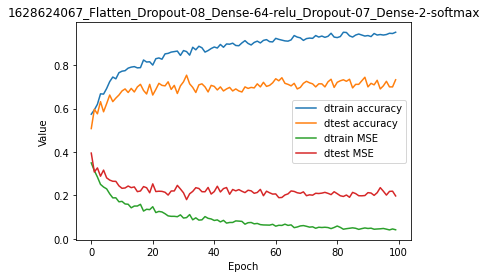

In [6]:
model.plot(path=False)

## Recurrent Architectures

_

### Embedding

_

In [7]:
embedding = Embedding(X_data=X_features,
                      Y_data=Y_label,
                      X_encode=True,
                      Y_encode=True,
                      batch_size=32,
                      relative_size=(2, 1, 0))

_

### Long Short-Term Memory (LSTM)

_

In [8]:
name = 'LSTM_Dense-2-softmax'

se_hPars['learning_rate'] = 0.1
se_hPars['softmax_temperature'] = 5

lstm = LSTM(21)

dense = Dense(2, softmax)

layers = [embedding, lstm, dense]

model = EpyNN(layers=layers, name=name)

_

In [9]:
model.initialize(loss='BCE', seed=1, se_hPars=se_hPars.copy())

--- EpyNN Check --- 
Layer: Embedding
compute_shapes: Embedding
initialize_parameters: Embedding
forward: Embedding
Layer: LSTM
compute_shapes: LSTM
initialize_parameters: LSTM
forward: LSTM
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: LSTM
backward: LSTM
compute_gradients: LSTM
Layer: Embedding
backward: Embedding
compute_gradients: Embedding


_

In [10]:
model.train(epochs=100, init_logs=False)

+-------+----------+----------+-------+----------+-------+-------+---------------------------------+
| epoch |  lrate   |  lrate   |       | accuracy |       |  BCE  |           Experiment            |
|       |   LSTM   |  Dense   |  (0)  |   (1)    |  (0)  |  (1)  |                                 |
+-------+----------+----------+-------+----------+-------+-------+---------------------------------+
|   0   | 1.00e-01 | 1.00e-01 | 0.557 |  0.539   | 0.684 | 0.686 | 1628624078_LSTM_Dense-2-softmax |
|  10   | 1.00e-01 | 1.00e-01 | 0.687 |  0.679   | 0.577 | 0.602 | 1628624078_LSTM_Dense-2-softmax |
|  20   | 1.00e-01 | 1.00e-01 | 0.713 |  0.703   | 0.553 | 0.586 | 1628624078_LSTM_Dense-2-softmax |
|  30   | 1.00e-01 | 1.00e-01 | 0.730 |  0.724   | 0.534 | 0.569 | 1628624078_LSTM_Dense-2-softmax |
|  40   | 1.00e-01 | 1.00e-01 | 0.737 |  0.719   | 0.523 | 0.557 | 1628624078_LSTM_Dense-2-softmax |
|  50   | 1.00e-01 | 1.00e-01 | 0.741 |  0.724   | 0.519 | 0.547 | 1628624078_LSTM_Dense-2-

_

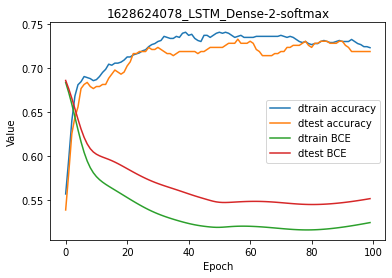

In [11]:
model.plot(path=False)

### LSTM + FF with Dropout

_

In [12]:
name = 'LSTM-21-Seq_Flatten_Dense-64-relu_Dropout-07_Dense-2-softmax'

se_hPars['learning_rate'] = 0.01
se_hPars['softmax_temperature'] = 5

lstm = LSTM(21, sequences=True)

flatten = Flatten()

hidden_dense = Dense(64, relu)

dropout2 = Dropout(keep_prob=0.7)

dense = Dense(2, softmax)

layers = [embedding, lstm, flatten, hidden_dense, dropout2, dense]

model = EpyNN(layers=layers, name=name)

_

In [13]:
model.initialize(loss='BCE', seed=1, se_hPars=se_hPars.copy())

--- EpyNN Check --- 
Layer: Embedding
compute_shapes: Embedding
initialize_parameters: Embedding
forward: Embedding
Layer: LSTM
compute_shapes: LSTM
initialize_parameters: LSTM
forward: LSTM
Layer: Flatten
compute_shapes: Flatten
initialize_parameters: Flatten
forward: Flatten
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dropout
compute_shapes: Dropout
initialize_parameters: Dropout
forward: Dropout
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: Dropout
backward: Dropout
compute_gradients: Dropout
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: Flatten
backward: Flatten
compute_gradients: Flatten
Layer: LSTM
backward: LSTM
compute_gradients: LSTM
Layer: Embedding
backward: Embedding
compute_gradients: Embedding


_

In [14]:
model.train(epochs=100, init_logs=False)

+-------+----------+----------+----------+-------+----------+-------+-------+-------------------------------------------------------------------------+
| epoch |  lrate   |  lrate   |  lrate   |       | accuracy |       |  BCE  |                               Experiment                                |
|       |   LSTM   |  Dense   |  Dense   |  (0)  |   (1)    |  (0)  |  (1)  |                                                                         |
+-------+----------+----------+----------+-------+----------+-------+-------+-------------------------------------------------------------------------+
|   0   | 1.00e-02 | 1.00e-02 | 1.00e-02 | 0.717 |  0.696   | 0.604 | 0.611 | 1628624148_LSTM-21-Seq_Flatten_Dense-64-relu_Dropout-07_Dense-2-softmax |
|  10   | 1.00e-02 | 1.00e-02 | 1.00e-02 | 0.869 |  0.808   | 0.332 | 0.408 | 1628624148_LSTM-21-Seq_Flatten_Dense-64-relu_Dropout-07_Dense-2-softmax |
|  20   | 1.00e-02 | 1.00e-02 | 1.00e-02 | 0.917 |  0.794   | 0.249 | 0.426 | 1628624148

_

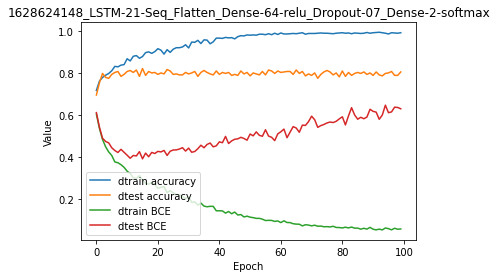

In [15]:
model.plot(path=False)